# Examples

Models for examples should be downloaded manually, or just run `prepare_and_run_tests.sh`

For actual code, please refer to python modules, from where model classes were imported

## RateMe is a YOLO3 example

It trained to detect like/dislike gestures

https://github.com/heyml/rateme

In [9]:
import cv2
import matplotlib.pyplot as plt

from rateme.utils import RateMe

In [12]:
model = RateMe()
img = cv2.imread('dislike.jpg')
model.predict(img)
#'dislike'

'dislike'

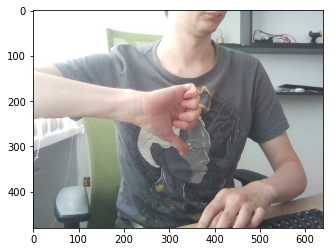

In [14]:
# show original RGB image
plt.imshow(img[::,::,::-1])

## Text detection and recognition pipeline

PixelLink (text detector):
+ [description](https://github.com/openvinotoolkit/open_model_zoo/blob/master/models/intel/text-detection-0004/description/text-detection-0004.md)
+ [original article](https://arxiv.org/abs/1801.01315)

Text Recognizer (BiLSTM + VGG16):
+ [description](https://github.com/openvinotoolkit/open_model_zoo/blob/master/models/intel/text-recognition-0012/description/text-recognition-0012.md)

> The network output can be decoded by CTC Greedy Decoder or CTC Beam Search decoder

For that I am using TensorFlow

In [2]:
import cv2
from pixellink import PixelLinkDetector
from text_recognition import TextRecognizer
 
img = cv2.imread('helloworld.png')
detector4 = PixelLinkDetector('text-detection-0004.xml')
detector4.detect(img)
bboxes = detector4.decode()

recognizer12 = TextRecognizer('./text-recognition-0012.xml')
recognizer12.do_ocr(img, bboxes)


['hello', 'world']

### Text detection output

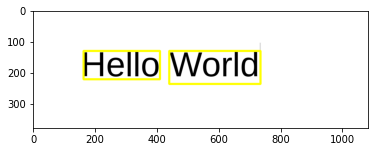

In [3]:
import matplotlib.pyplot as plt


tmp = img.copy()
for b in bboxes:
    cv2.rectangle(tmp, (b[1], b[0]), (b[3], b[2]), (255, 255, 0), 5)
plt.imshow(tmp)

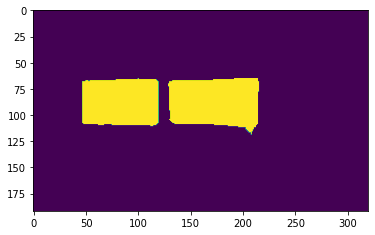

In [6]:
# text mask, from which bounding boxes were calculated
plt.imshow(detector4.get_mask())